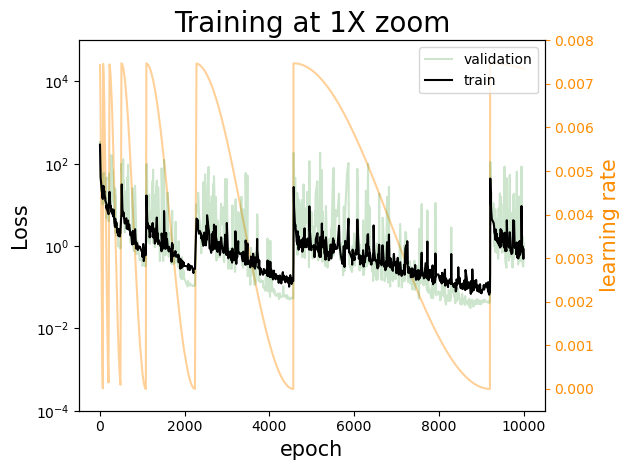

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import matplotlib
import numpy as np

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

matplotlib.rcParams.update({'font.size': 22})

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Structure paths for exampls as 
# paths = [
#     loss,
#     lr,
# ]
# desc = corresponding descriptions for the legend.

paths = [
    # Search 1
    # Path('../multirun/2022-11-17/16-37-00/0/optuna/71_epoch_loss_val.csv'),
    # Path('../multirun/2022-11-17/16-37-00/0/optuna/71_epoch_loss_train.csv'),
    # Path('../multirun/2022-11-17/16-37-00/0/optuna/71_lr.csv'),

    # Search 2
    # Path('../multirun/2022-12-24/08-08-21/0_tensorboard_184_epoch_loss_val.csv'),
    # Path('../multirun/2022-12-24/08-08-21/0_tensorboard_184_epoch_loss_train.csv'),
    # Path('../multirun/2022-12-24/08-08-21/0_tensorboard_184_lr.csv'),

    # Search 3
    # Path('../multirun/2022-12-16/23-08-20/0_tensorboard_45_epoch_loss_val.csv'),
    # Path('../multirun/2022-12-16/23-08-20/0_tensorboard_45_epoch_loss_train.csv'),
    # Path('../multirun/2022-12-16/23-08-20/0_tensorboard_45_lr.csv'),

    # TRAINING 30
    # Path('../multirun/2023-01-11/11-11-59/0/11-11-59_0_tensorboard_0_epoch_loss_val.csv'),
    # Path('../multirun/2023-01-11/11-11-59/0/11-11-59_0_tensorboard_0_epoch_loss_train.csv'),
    # Path('../multirun/2023-01-11/11-11-59/0/11-11-59_0_tensorboard_0.csv'),

    # TRAINING 20
    # Path('../multirun/2023-01-12/09-15-00/0/09-15-00_0_tensorboard_0_epoch_loss_val.csv'),
    # Path('../multirun/2023-01-12/09-15-00/0/09-15-00_0_tensorboard_0_epoch_loss_train.csv'),
    # Path('../multirun/2023-01-11/11-11-59/0/11-11-59_0_tensorboard_0.csv'),

    # TRAINING 10
    # Path('../multirun/2023-01-12/03-51-24/0/03-51-24_0_tensorboard_0_epoch_loss_val.csv'),
    # Path('../multirun/2023-01-12/03-51-24/0/03-51-24_0_tensorboard_0_epoch_loss_train.csv'),
    # Path('../multirun/2023-01-11/11-11-59/0/11-11-59_0_tensorboard_0.csv'),

    # TRAINING AT 1X ZOOM
    Path('../multirun/2023-01-19/00-34-59/0/0_epoch_loss_val.csv'),
    Path('../multirun/2023-01-19/00-34-59/0/0_epoch_loss_train.csv'),
    Path('../multirun/2023-01-19/00-34-59/0/0_lr.csv'),
]

descs = [
    "validation",
    "train",
    "lr",
]

colors = [
    'green',
    'k',
    'darkorange'
]

title = "Training at 1X zoom"

fig, ax1 = plt.subplots()

# Losses
data = pd.read_csv(paths[0])
p1, = ax1.plot(data['Step'], data['Value'], label=descs[0], color=colors[0], alpha=0.2)
data = pd.read_csv(paths[1])
p2, = ax1.plot(data['Step'], data['Value'], label=descs[1], color=colors[1])
ax1.set_yscale('log')
ax1.set_ylim(bottom=1e-4, top=1e5)
ax1.set_ylabel("Loss")
ax1.set_xlabel("epoch")

# LR
ax2 = ax1.twinx()
data = pd.read_csv(paths[2])
p3, = ax2.plot(data['Step'], data['Value'], label=descs[2], color=colors[2], alpha=0.4)
ax2.set_ylabel("learning rate")

ax2.yaxis.label.set_color(p3.get_color())
ax2.tick_params(axis='y', colors=p3.get_color())
ax2.set_ylim([-0.0005, 0.008])

ax1.legend(handles=[p1, p2], loc='upper right')

ax1.set_title(title)

# Order different axis. https://stackoverflow.com/a/58909656/8797886
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)

plt.tight_layout()
plt.show()

In [2]:
Path(f"outputs/plot-from-csv/").mkdir(parents=True, exist_ok=True)

format = "pdf"

fig.savefig(f"outputs/plot-from-csv/{title.replace(' ', '_')}.{format}", format=format)